## 遗传算法详解---附加一个计算例子的代码实现

## 我的初步理解
首先第一步可以理解为在函数上找一堆点，构成一个群体。那么这些点对应的自变量和应变量都是数字对吧？然后对这些自变量x，每个十进制数字都可以编码称为一串二进制的数，例如[0001001100],把这个东西近似看作染色体，通过对他里面的0-1进行交叉变异，然后计算每一代种群的y值，好的染色体保留并被选择，坏的淘汰。
## 有趣的算法---另类理解，加深记忆
“袋鼠跳”问题

既然我们把函数曲线理解成一个一个山峰和山谷组成的山脉。那么我们可以设想所得到的每一个解就是一只袋鼠，我们希望它们不断的向着更高处跳去，直到跳到最高的山峰（尽管袋鼠本身不见得愿意那么做）。所以求最大值的过程就转化成一个“袋鼠跳”的过程。

作为对比下面简单介绍“袋鼠跳”的几种方式。

 1. 爬山法（最速上升爬山法）：

      从搜索空间中随机产生邻近的点，从中选择对应解最优的个体，替换原来的个体，不断重复上述过程。因为爬山法只对“邻近”的点作比较，所以目光比较“短浅”，常常只能收敛到离开初始位置比较近的局部最优解上面。对于存在很多局部最优点的问题，通过一个简单的迭代找出全局最优解的机会非常渺茫。（在爬山法中，袋鼠最有希望到达最靠近它出发点的山顶，但不能保证该山顶是珠穆朗玛峰，或者是一个非常高的山峰。因为一路上它只顾上坡，没有下坡。）

2. 模拟退火：

     这个方法来自金属热加工过程的启发。在金属热加工过程中，当金属的温度超过它的熔点（Melting Point）时，原子就会激烈地随机运动。与所有的其它的物理系统相类似，原子的这种运动趋向于寻找其能量的极小状态。在这个能量的变迁过程中，开始时，温度非常高， 使得原子具有很高的能量。随着温度不断降低，金属逐渐冷却，金属中的原子的能量就越来越小，最后达到所有可能的最低点。利用模拟退火的时候，让算法从较大的跳跃开始，使到它有足够的“能量”逃离可能“路过”的局部最优解而不至于限制在其中，当它停在全局最优解附近的时候，逐渐的减小跳跃量，以便使其“落脚 ”到全局最优解上。（在模拟退火中，袋鼠喝醉了，而且随机地大跳跃了很长时间。运气好的话，它从一个山峰跳过山谷，到了另外一个更高的山峰上。但最后，它渐渐清醒了并朝着它所在的峰顶跳去。）

3. 遗传算法：

    模拟物竞天择的生物进化过程，通过维护一个潜在解的群体执行了多方向的搜索，并支持这些方向上的信息构成和交换。是以面为单位的搜索，比以点为单位的搜索，更能发现全局最优解。（在遗传算法中，有很多袋鼠，它们降落到喜玛拉雅山脉的任意地方。这些袋鼠并不知道它们的任务是寻找珠穆朗玛峰。但每过几年，就在一些海拔高度较低的地方射杀一些袋鼠，并希望存活下来的袋鼠是多产的，在它们所处的地方生儿育女。）（或者换个说法。从前，有一大群袋鼠，它们被莫名其妙的零散地遗弃于喜马拉雅山脉。于是只好在那里艰苦的生活。海拔低的地方弥漫着一种无色无味的毒气，海拔越高毒气越稀薄。可是可怜的袋鼠们对此全然不觉，还是习惯于活蹦乱跳。于是，不断有袋鼠死于海拔较低的地方，而越是在海拔高的袋鼠越是能活得更久，也越有机会生儿育女。就这样经过许多年，这些袋鼠们竟然都不自觉地聚拢到了一个个的山峰上，可是在所有的袋鼠中，只有聚拢到珠穆朗玛峰的袋鼠被带回了美丽的澳洲。）

## 遗传算法寻找方程最大值代码实现
比如我们要解下面这个方程的最大值 $$y=x*sin(10\pi x)+2$$然后画出函数图像如下：
[借鉴博客](http://czrzchao.com/simpleGaByPython)
[大白话GA](https://blog.csdn.net/hiudawn/article/details/80144221)

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

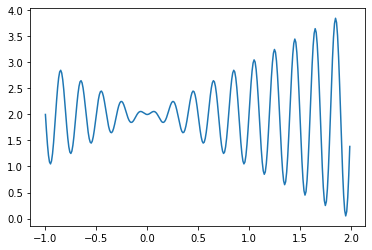

In [51]:
x = np.arange(-1,2,0.01)
y = x*np.sin(10*np.pi*x)+2
plt.plot(x,y)
plt.show

1. 首先我们生成一堆个体，构成一个种群，分布在函数的不同区域。

In [52]:
def geneEncoding(pop_size, chrom_length):
    '''
    输入 ： 种群大小  染色体长度
    输出 ： 染色体种群
    '''
    pop = [[]]
    for i in range(pop_size):
        temp = []
        for j in range(chrom_length):
            temp.append(random.randint(0, 1))
        pop.append(temp)

    return pop[1:]


In [53]:
gene = geneEncoding(5,3)
gene

[[1, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 1, 0]]

In [54]:
def main_fun(x):
    y = x*np.sin(10*np.multiply(np.pi,x))+2
    return y

In [55]:
main_fun([1,0.0555555,0.05])

array([2.       , 2.0547115, 2.05     ])

In [56]:
def plot_currnt_individual(X, Y):
    X1 = np.arange(-1,2,0.01)
    Y1 = main_fun(x)
    plt.plot(X1, Y1)
    plt.scatter(X, Y, c='r', s=5)
    plt.show()

这里的二进制计算得到的十进制，就是最简单的进制转换了，比如一个二进制为10101，转化为十进制就是1×24+0×23+1×22+0×21+1×20=21
然后将这个数字再次映射到x的允许区间内。比如另 P=21 则$$x=X_{min}+\frac{p*(X_{max} - X_{min})}{2^{染色体长度}-1})$$这样就将染色体解码为十进制的X区间内的数。

In [57]:
def decodechrom(pop, chromosome_length, upper_limit,lower_limit):
    '''
    解码染色体  就是将二进制转换为10进制
    输入：种群 染色体长度 x的最大值(右端点)
    输出：十进制的染色体代表的数
    '''
    X = []
#     if len(pop) != 1:
        
    for ele in pop:

        temp = 0
        # 二进制变成实数，种群中的每个个体对应一个数字
        for i, coff in enumerate(ele):
            # 就是把二进制转化为十进制的
            temp += coff * (2 ** i)

        # 这个是把前面得到的那个十进制的数，再次缩放为另一个实数
        # 注意这个实数范围更广泛，可以是小数了，而前面二进制解码后只能是十进制的数
        # 参考https://blog.csdn.net/robert_chen1988/article/details/79159244
        X.append(lower_limit + (temp * (upper_limit-lower_limit)) / (2 ** chromosome_length - 1))

    return X

In [58]:
len([[1,0,1]])

1

In [59]:
test = decodechrom([[1,0,0]],3,2,-1)
test

[-0.5714285714285714]

2. 计算每个染色体所所对应的目标函数值

In [60]:
def calobjValue(pop, chrom_length, max_value,min_value):
    '''
    输入：种群  染色体长度  最大的X
    输出： 目标函数值
    '''
    temp1 = []
    obj_value = []
    temp1 = decodechrom(pop, chrom_length,max_value,min_value)   # 解码染色体
    obj_value = main_fun(temp1)
    return obj_value


In [61]:
calobjValue(gene,3,2,-1)

array([0.88579667, 2.        , 1.55323915, 2.        , 2.12396678])

3. 需要一个淘汰的操作，目的是为了去除掉一些坏的基因，比如说这个函数值全是大于0的，如果产生负值，就需要淘汰掉这个基因。

In [62]:
# 淘汰（去除负值）
def calfitValue(obj_value):
    '''
    输入： 目标函数值
    输出： 淘汰后的目标函数值
    '''
    fit_value = []
    # 去掉小于0的值，更改c_min会改变淘汰的下限
    # 比如设成10可以加快收敛
    # 但是如果设置过大，有可能影响了全局最优的搜索
    c_min = 2
    for value in obj_value:
        if value > c_min:
            temp = value
        else:
            temp = 0.
        fit_value.append(temp)
    # fit_value保存的是活下来的值
    return fit_value

#### 选择
这是最重要的部分，利用 ‘适者生存’ 的原理，谁对这个函数有大的概率适应谁就应该存活，从而繁殖后代，壮大它附近的家族。
网上有很多代码这部分其实有错误，他们做出的图像都不收敛。
最终翻阅到了遗传工具箱的代码，适当改变放在这里。这一部分极其重要，决定着算法的效果。

In [63]:
# 选择

def cum_sum(fit_value):
    # 输入[1, 2, 3, 4, 5]，返回[1,3,6,10,15]，matlab的一个函数
    # 这个地方遇坑，局部变量如果赋值给引用变量，在函数周期结束后，引用变量也将失去这个值
    temp = fit_value[:]
    for i in range(len(temp)):
        fit_value[i] = (sum(temp[:i + 1]))
        
    return temp

# 找出最优解和最优解的基因编码
def find_best(pop, fit_value):
    # 用来存最优基因编码
    best_individual = []
    # 先假设第一个基因的适应度最好
    best_fit = fit_value[0]
    for i in range(1, len(pop)):
        if (fit_value[i] > best_fit):
            best_fit = fit_value[i]
            best_individual = pop[i]
    # best_fit是最大的适应值
    # best_individual是对应的基因序列
    return [best_individual], best_fit

def selection(pop, fit_value):
    s=sum(fit_value)
    temp=[k*1.0/s for k in fit_value]
    temp2=[]

    s2=0
    for k in temp:
        s2=s2+k
        temp2.append(s2)

    temp3=[]
    for _ in range(len(pop)):
        r=random.random()
        for i in range(len(temp2)):
            if r<=temp2[i]:
                temp3.append(i)
                break

    temp4=[]
    temp5=[]
    for i in temp3:
        temp4.append(pop[i])
        temp5.append(fit_value[i])
    pop[:]=temp4
    fit_value[:]=temp5
    return pop

In [64]:
selection([[1,0,1],[0,0,1]],[56,59])

[[1, 0, 1], [1, 0, 1]]

In [65]:
# 交叉
def crossover(pop, pc):
    '''
    输入：种群 杂交概率
    输出：杂交后的种群
    
    
    '''
    pop_len = len(pop)
    for i in range(pop_len - 1):
        if(random.random() < pc):
            cpoint = random.randint(0,len(pop[0]))
            temp1 = []
            temp2 = []
            temp1.extend(pop[i][0:cpoint])
            temp1.extend(pop[i+1][cpoint:len(pop[i])])
            temp2.extend(pop[i+1][0:cpoint])
            temp2.extend(pop[i][cpoint:len(pop[i])])
            pop[i] = temp1
            pop[i+1] = temp2
    return pop
    

In [66]:
# 基因突变
def mutation(pop, pm):
    
    '''
    输入：种群 变异概率
    输出：基因突变后的种群
    
    '''
    px = len(pop)
    py = len(pop[0])
    # 每条染色体随便选一个杂交
    for i in range(px):
        if (random.random() < pm):
            mpoint = random.randint(0, py - 1)
            if (pop[i][mpoint] == 1):
                pop[i][mpoint] = 0
            else:
                pop[i][mpoint] = 1
    return pop


In [67]:
def plot_iter_curve(iter, results):
    X = [i for i in range(iter)]
    Y = [results[i][1] for i in range(iter)]
    plt.figure(figsize=(8,6),dpi=100)
    p = plt.plot(X, Y)
#     plt.title('遗传算法迭代曲线')
#     plt.xlabel('迭代次数')
#     plt.ylabel('最优值')
    plt.show()

In [73]:
def main():
    pop_size = 500  # 种群数量
    upper_limit = 2  # 基因中允许出现的最大值
    lower_limit = -1
    chromosome_length = 10  # 染色体长度
    iters = 1600
    pc = 0.6 # 杂交概率
    pm = 0.05  # 变异概率
    results = []  # 存储每一代的最优解，N个二元组

    pop = geneEncoding(pop_size, chromosome_length)
    best_X = []
    best_Y = []
    for i in range(iters):
        obj_value = calobjValue(pop, chromosome_length, upper_limit,lower_limit)  # 个体评价，有负值
        fit_value = calfitValue(obj_value)  # 个体适应度，不好的归0，可以理解为去掉上面的负值
        best_individual, best_fit = find_best(pop, fit_value)  # 第一个是最优基因序列, 第二个是对应的最佳个体适度
        
        # 下面这句就是存放每次迭代的最优x值是最佳y值
        results.append([decodechrom(best_individual, chromosome_length,upper_limit,lower_limit), best_fit])
        #print(results)
        # 查看一下种群分布
        
        if i % 100 ==0:
            plot_currnt_individual(decodechrom(pop, chromosome_length, upper_limit,lower_limit), obj_value)
#         if i % 500 == 0:
#             plt.scatter(results[-1][0],results[-1][1])
        
        pop = selection(pop, fit_value)  # 选择
        pop = crossover(pop, pc)  # 染色体交叉（最优个体之间进行0、1互换）
        pop = mutation(pop, pm)  # 染色体变异（其实就是随机进行0、1取反）
        # 最优解的变化
        if i % 50 == 0:
            best_X.append(results[-1][0])
            best_Y.append(results[-1][1])
    #print("x = %f, y = %f" % (results[-1][0], results[-1][1]))
    # 看种群点的选择
#     col = [i for i in range(len(best_X))]
    plt.scatter(best_X[-1], best_Y[-1],s=15,c='r',)
    x = np.arange(-1,2,0.01)
    y = x*np.sin(10*np.pi*x)+2
    plt.plot(x,y)
    plt.show
    # 看迭代曲线 
    #plot_iter_curve(iters, results)

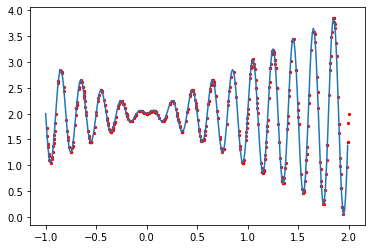

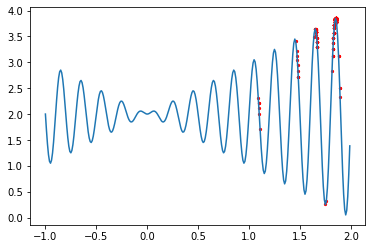

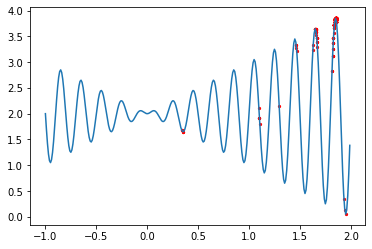

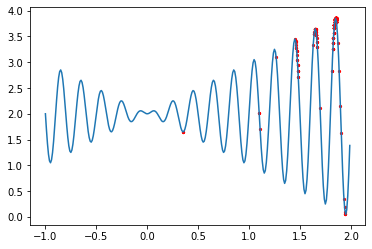

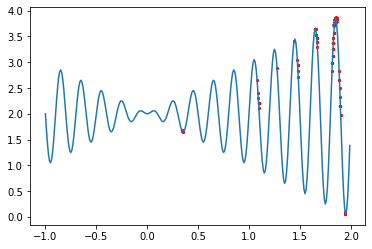

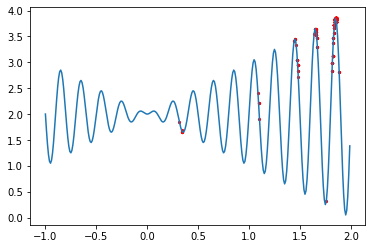

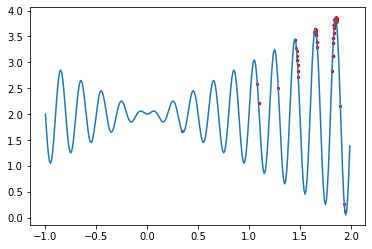

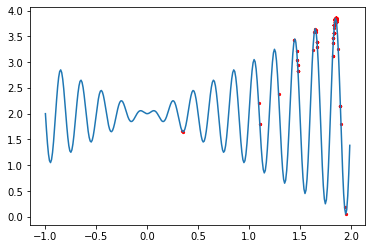

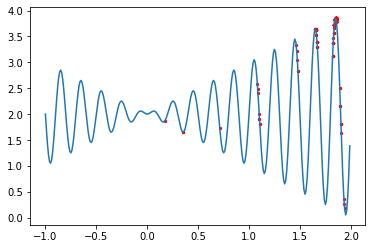

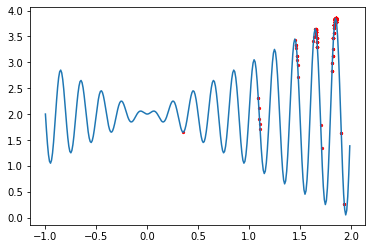

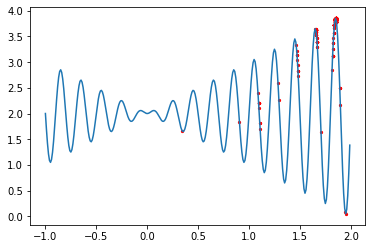

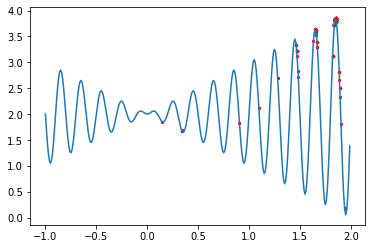

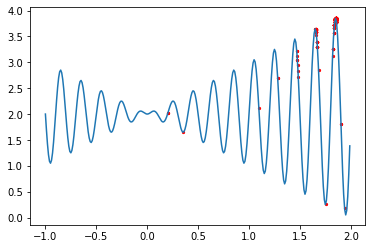

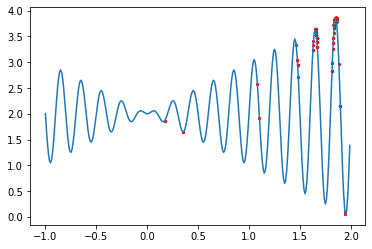

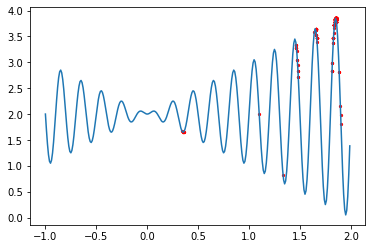

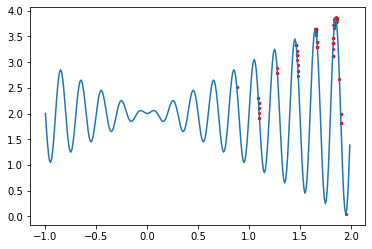

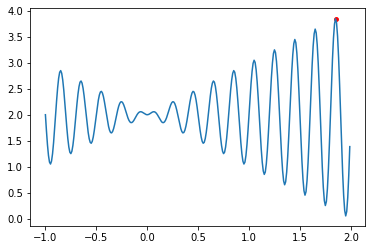

In [74]:
main()

In [70]:
plt.scatter?